In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

import matplotlib.pyplot as plt
import seaborn as sns

# Import Datasets

In [2]:
bangalore = pd.read_csv("datasets/Bangalore.csv")
chennai = pd.read_csv("datasets/Chennai.csv")

# gabungkan file tersebut dan namai dengan df
df = pd.concat([bangalore, chennai])

# bikin index ulang.
df = df.reset_index()

# hapus colom index lama.
df.drop(columns="index", inplace=True)

# tampilkan 5 data
df.head()

Price  Area                         Location  No. of Bedrooms  Resale  \
0  30000000  3340                 JP Nagar Phase 1                4       0   
1   7888000  1045       Dasarahalli on Tumkur Road                2       0   
2   4866000  1179  Kannur on Thanisandra Main Road                2       0   
3   8358000  1675                     Doddanekundi                3       0   
4   6845000  1670                          Kengeri                3       0   

   MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  \
0                 1          1             1                  1             1   
1                 0          1             1                  1             1   
2                 0          1             1                  1             1   
3                 0          0             0                  0             0   
4                 1          1             1                  1             1   

   ...  LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0  ...              1    0                0          0           0   0   
1  ...              1    0                1          0           0   0   
2  ...              1    0                0          0           0   0   
3  ...              1    0                0          0           0   0   
4  ...              1    0                0          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

# Cek Data Bolong

In [7]:
df.isna().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


# Visualize
### Data Target

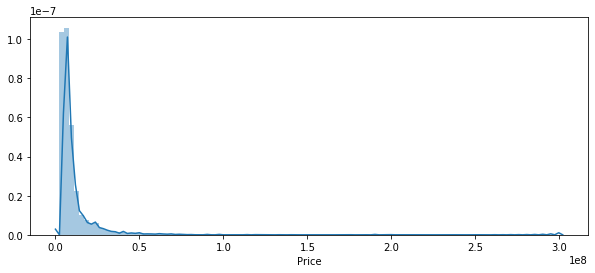

In [13]:
plt.figure(figsize=(10, 4))
ax = sns.distplot(df["Price"], bins=100)
plt.show()

### Data kolom Area

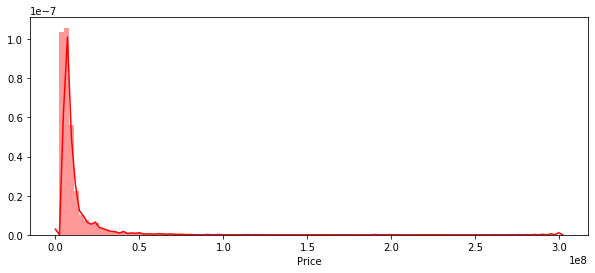

In [14]:
plt.figure(figsize=(10, 4))
ax = sns.distplot(df["Price"], bins=100, color='r')
plt.show()

# Datasets Splitting

In [15]:
X = df.drop(columns="Price")
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8976, 39), (2245, 39), (8976,), (2245,))

# Think Simple
### Preprocessor

In [19]:
from xgboost import XGBRegressor

In [21]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["Area", "No. of Bedrooms"]),
    ('categoric', cat_pipe(encoder='onehot'), ["Location",'Resale', 'MaintenanceStaff', 'Gymnasium', 'SwimmingPool',
                                               'LandscapedGardens', 'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames',
                                               'ShoppingMall', 'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
                                               '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
                                               'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC', 'Wifi',
                                               "Children'splayarea", 'LiftAvailable', 'BED', 'VaastuCompliant', 'Microwave',
                                               'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator']),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

### Training

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [24]:
model = RandomizedSearchCV(pipeline, rsp.xgb_params , cv=3, n_iter=20, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   19.9s finished


[19:12:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'algo__colsample_bytree': 0.42066805426927745, 'algo__gamma': 1, 'algo__learning_rate': 0.035015835937029005, 'algo__max_depth': 9, 'algo__n_estimators': 176, 'algo__reg_alpha': 2.772824182801065, 'algo__reg_lambda': 0.0010661259689433889, 'algo__subsample': 0.5553736512887829}
0.5839457101335508 0.30942894271104165 0.3815391360098812
